# PVlib introduction  
https://pvlib-python.readthedocs.io/en/stable/  


In [1]:
import pvlib
from pvlib import pvsystem

sandia_modules = pvsystem.retrieve_sam(name='SandiaMod')
print(sandia_modules)

                                         Advent_Solar_AS160___2006_  \
Vintage                                                        2006   
Area                                                          1.312   
Material                                                      mc-Si   
Cells_in_Series                                                  72   
Parallel_Strings                                                  1   
Isco                                                          5.564   
Voco                                                         42.832   
Impo                                                          5.028   
Vmpo                                                          32.41   
Aisc                                                       0.000537   
Aimp                                                      -0.000491   
C0                                                           1.0233   
C1                                                          -0.0233   
Bvoco 

In [2]:
inverters = pvsystem.retrieve_sam('sandiainverter')
print(inverters)

          ABB__MICRO_0_25_I_OUTD_US_208__208V_  \
Vac                                        208   
Pso                                    2.08961   
Paco                                       250   
Pdco                                   259.589   
Vdco                                        40   
C0                                    -4.1e-05   
C1                                    -9.1e-05   
C2                                    0.000494   
C3                                   -0.013171   
Pnt                                      0.075   
Vdcmax                                      50   
Idcmax                                 6.48972   
Mppt_low                                    30   
Mppt_high                                   50   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_25_I_OUTD_US_240__240V_  \
Vac                                        240   
Pso                                    2.24041   

In [19]:
from pvlib.pvsystem import PVSystem

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

system = PVSystem(surface_tilt=20, surface_azimuth=200,
                  module_parameters=module,
                  inverter_parameters=inverter)

In [20]:
from pvlib.location import Location

location = Location(latitude=50.941357, longitude= 6.958307)

In [21]:
from pvlib.modelchain import ModelChain

mc = ModelChain(system, location)

In [22]:
import pandas as pd

weather = pd.read_csv("./data/dwd_pv_data_2015.csv", index_col="time")
weather.head()

,dhi,ghi,dni
time,,,
2015-01-01 00:00:00,0.0,0.0,0.0
2015-01-01 00:15:00,0.0,0.0,0.0
2015-01-01 00:30:00,0.0,0.0,0.0
2015-01-01 00:45:00,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,0.0,0.0


In [23]:
mc.run_model(weather=weather)

C:\Users\sbirk\Documents\Anaconda3\envs\testbed\lib\site-packages\pvlib\pvsystem.py:485: pvlibDeprecationWarning: temperature_model_parameters, racking_model, and module_type are not specified. Reverting to deprecated default: SAPM cell temperature model parameters for a glass/glass module in open racking. In v0.9, temperature_model_parameters or a valid combination of racking_model and module_type will be required.
  pvlibDeprecationWarning)


ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [10]:
mc.__dict__.keys()

dict_keys(['name', 'system', 'location', 'clearsky_model', 'transposition_model', 'solar_position_method', 'airmass_model', '_dc_model', '_ac_model', '_aoi_model', '_spectral_model', '_temperature_model', '_losses_model', '_orientation_strategy', 'weather', 'times', 'solar_position', 'airmass', 'aoi', 'total_irrad', 'aoi_modifier', 'spectral_modifier', 'effective_irradiance', 'cell_temperature', 'dc', 'losses', 'ac'])

In [24]:
mc.ac

time
2015-01-01 00:00:00   -0.075
2015-01-01 00:15:00   -0.075
2015-01-01 00:30:00   -0.075
2015-01-01 00:45:00   -0.075
2015-01-01 01:00:00   -0.075
                       ...  
2015-12-31 22:45:00   -0.075
2015-12-31 23:00:00   -0.075
2015-12-31 23:15:00   -0.075
2015-12-31 23:30:00   -0.075
2015-12-31 23:45:00   -0.075
Length: 35040, dtype: float64

<AxesSubplot:xlabel='time'>

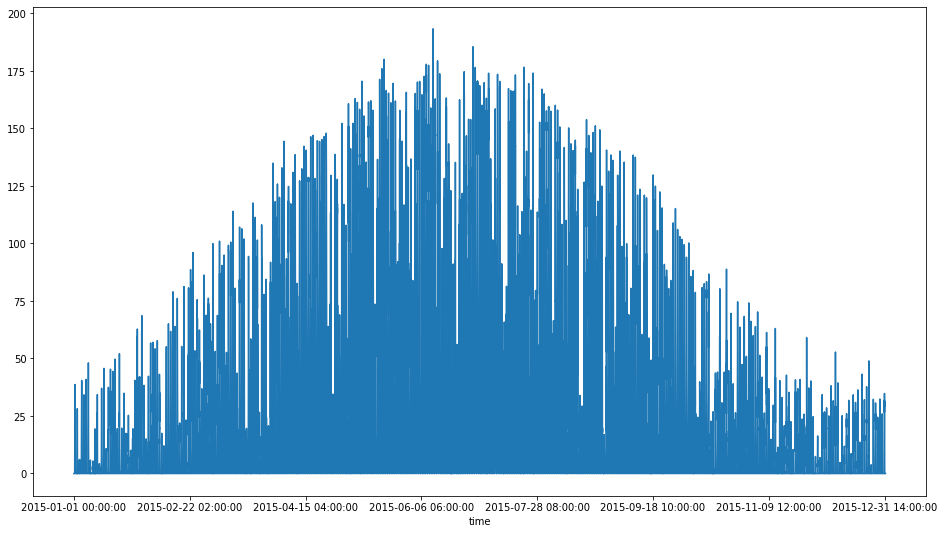

In [26]:
mc.ac.plot(figsize=(16,9))